In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

%load_ext autotime


time: 300 µs (started: 2024-03-10 16:48:33 +05:30)


In [2]:
cust_segm=pd.read_csv('/Users/saurabhyadav/Documents/Personal/ML_2024/Mall_Customers 3.csv')

time: 4.29 ms (started: 2024-03-10 16:48:33 +05:30)


In [3]:
cust_segm.drop(columns='CustomerID',inplace=True)

time: 1.7 ms (started: 2024-03-10 16:48:33 +05:30)


In [4]:
cust_segm.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


time: 11.8 ms (started: 2024-03-10 16:48:33 +05:30)


In [5]:
# Converting male and female to 0 and 1 respectively
cust_segm['Gender']=pd.get_dummies(cust_segm['Gender'])

time: 2.4 ms (started: 2024-03-10 16:48:33 +05:30)


In [6]:
# Checking null values

cust_segm.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

time: 3.99 ms (started: 2024-03-10 16:48:33 +05:30)


In [7]:
cust_segm.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


time: 21.3 ms (started: 2024-03-10 16:48:33 +05:30)


In [8]:
# We see some difference in scales of features, so normlaising them
# let's normalise the dataset and check 

time: 252 µs (started: 2024-03-10 16:48:33 +05:30)


In [9]:
cust_segm_2=cust_segm[['Age','Annual Income (k$)','Spending Score (1-100)']]

time: 1.21 ms (started: 2024-03-10 16:48:33 +05:30)


In [10]:
cust_segm_norm=(cust_segm_2-cust_segm_2.min())/(cust_segm_2.max()-cust_segm_2.min())
# cust_segm_norm['Gender']=cust_segm['Gender']

time: 20.7 ms (started: 2024-03-10 16:48:33 +05:30)


In [11]:
cust_segm_norm

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959
...,...,...,...
195,0.326923,0.860656,0.795918
196,0.519231,0.909836,0.275510
197,0.269231,0.909836,0.744898
198,0.269231,1.000000,0.173469


time: 9.9 ms (started: 2024-03-10 16:48:33 +05:30)


## Doing univariate analysis

<AxesSubplot: xlabel='Age'>

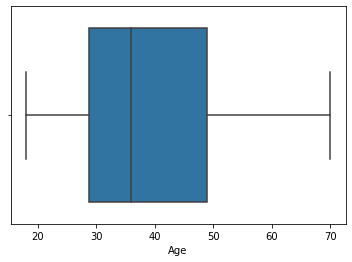

time: 157 ms (started: 2024-03-10 16:48:33 +05:30)


In [12]:
# Doing univariate analysis
sns.boxplot(cust_segm['Age'])

<AxesSubplot: xlabel='Annual Income (k$)'>

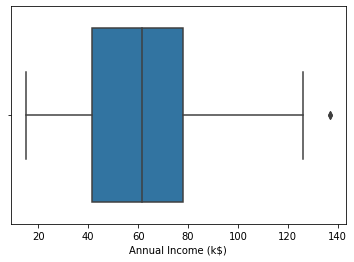

time: 139 ms (started: 2024-03-10 16:48:33 +05:30)


In [13]:
sns.boxplot(cust_segm['Annual Income (k$)'])

# Looks like a few outliers

<AxesSubplot: xlabel='Spending Score (1-100)'>

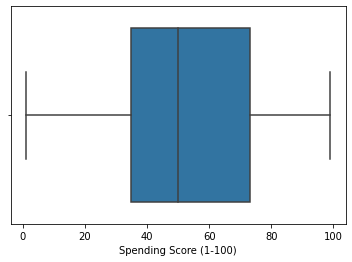

time: 141 ms (started: 2024-03-10 16:48:34 +05:30)


In [14]:
sns.boxplot(cust_segm['Spending Score (1-100)'])

## Bivariate analysis

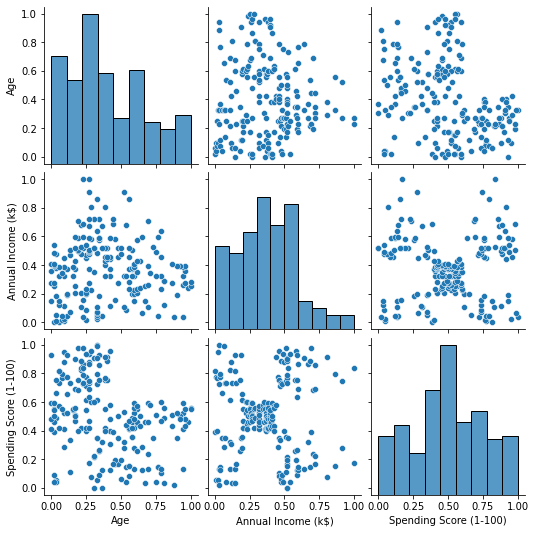

time: 2.3 s (started: 2024-03-10 16:48:34 +05:30)


In [15]:
sns.pairplot(cust_segm_norm)

<AxesSubplot: >

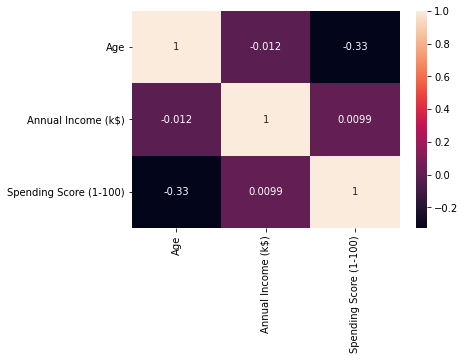

time: 341 ms (started: 2024-03-10 16:48:36 +05:30)


In [16]:
sns.heatmap(cust_segm_norm.corr(),annot=True)

In [17]:
# We don't see any direct correlation with spendng

time: 222 µs (started: 2024-03-10 16:48:36 +05:30)


### Applying ML model

In [18]:
from sklearn.cluster import KMeans

time: 327 ms (started: 2024-03-10 16:48:36 +05:30)


In [19]:
# To determine the number of clusters, using elbow method

cluster=[]
wcss=[]
comb=pd.DataFrame()
for i in range(1,11):
    kmeans=KMeans(n_clusters=i).fit(cust_segm_norm)
    metric=kmeans.inertia_
    cluster.append(i)
    wcss.append(metric)
    

time: 378 ms (started: 2024-03-10 16:48:37 +05:30)


In [20]:
cl_inert=pd.DataFrame(zip(cluster,wcss),columns=['cluster','wcss'])

time: 1.09 ms (started: 2024-03-10 16:48:37 +05:30)


<AxesSubplot: xlabel='cluster', ylabel='wcss'>

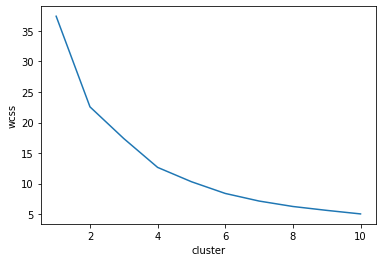

time: 197 ms (started: 2024-03-10 16:48:37 +05:30)


In [21]:
sns.lineplot(x='cluster',y='wcss',data=cl_inert)

In [22]:
# Keeping cluster count at 4

time: 231 µs (started: 2024-03-10 16:48:37 +05:30)


In [31]:
# Clustering over normalised data

time: 232 µs (started: 2024-03-10 16:50:26 +05:30)


<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

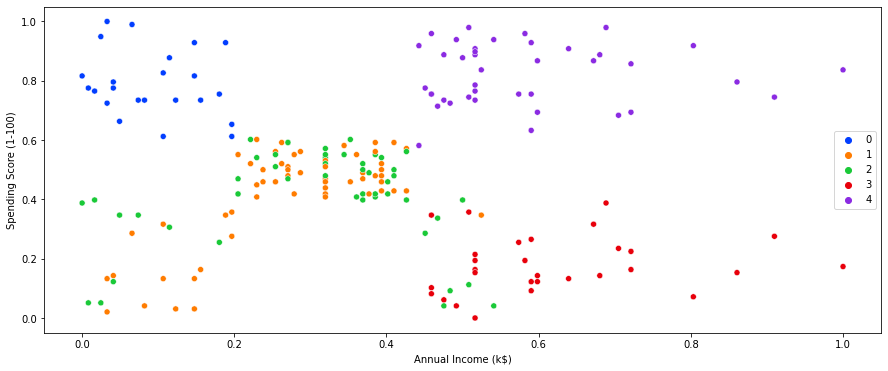

time: 477 ms (started: 2024-03-10 16:50:09 +05:30)


In [30]:
kmeans=KMeans(n_clusters=5).fit(cust_segm_norm)
plt.figure(figsize=(15,6))
sns.scatterplot(data=cust_segm_norm,x='Annual Income (k$)',y='Spending Score (1-100)',hue=kmeans.labels_,palette='bright')


In [32]:
# Clustering Original Data, non-normalised

time: 221 µs (started: 2024-03-10 16:50:55 +05:30)


<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

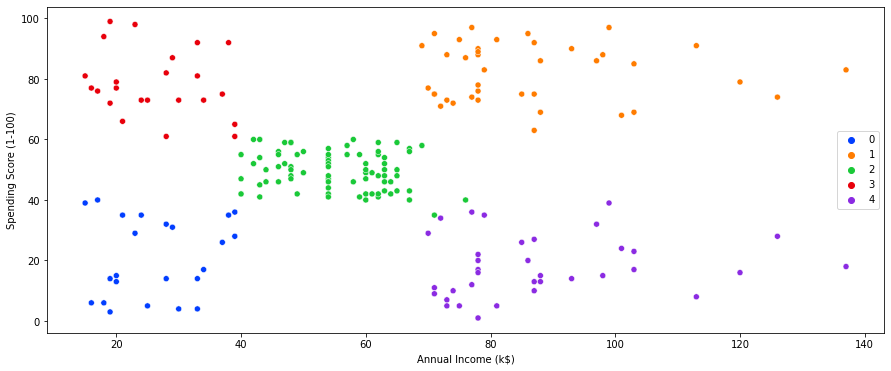

time: 467 ms (started: 2024-03-10 16:50:56 +05:30)


In [33]:
kmeans=KMeans(n_clusters=5).fit(cust_segm)
plt.figure(figsize=(15,6))
sns.scatterplot(data=cust_segm,x='Annual Income (k$)',y='Spending Score (1-100)',hue=kmeans.labels_,palette='bright')


In [37]:
# So normalising everytime doesn't help

time: 63.6 ms (started: 2024-03-25 13:36:49 +05:30)
